# import functions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
import seaborn as sns
from sklearn.impute import SimpleImputer
!pip install --quiet folium
import folium
from scipy import stats
from stats import ttest_ind

/Users/Dandan/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


# cleaning data

## read modified .csv

In [2]:
pop_df=pd.read_csv('~/code/eangelid/trampact/raw_data/BD_pop_new.csv')
pop_df.head()

/Users/Dandan/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,iris_id,T_pop_0_2_2006,T_pop_3_5_2006,T_pop_6_10_2006,T_pop_11_17_2006,T_pop_18_24_2006,T_pop_25_39_2006,T_pop_40_54_2006,T_pop_55_64_2006,T_pop_65_79_2006,...,Tx_pop_0_2_2016,Tx_pop_3_5_2016,Tx_pop_6_10_2016,Tx_pop_11_17_2016,Tx_pop_18_24_2016,Tx_pop_25_39_2016,Tx_pop_40_54_2016,Tx_pop_55_64_2016,Tx_pop_65_79_2016,Tx_pop_80plus_2016
0,10010000,44.000000,36.000000,62.000000,79.000000,50.000000,167.000000,166.000000,103.000000,79.000000,...,3.780965,2.346806,7.431552,11.734029,4.693611,13.820078,25.162973,12.385919,14.471969,4.172099
1,10020000,13.000000,8.000000,11.000000,15.000000,9.000000,52.000000,33.000000,21.000000,27.000000,...,5.761317,4.115226,5.761317,9.876543,3.292181,22.222222,20.576132,10.288066,13.580247,4.526749
2,10040101,102.578435,92.400657,100.583050,119.820995,263.545615,460.411348,359.023121,244.872598,154.870367,...,5.413987,3.035313,5.076466,6.477896,15.583666,20.543288,15.371706,10.565894,12.414497,5.517287
3,10040102,143.313242,135.919486,226.260032,297.791572,329.759478,678.257672,685.286092,268.187733,402.953915,...,4.983039,3.935430,6.032565,8.685425,9.894914,24.463538,16.962680,10.482694,9.491448,5.068267
4,10040201,150.656799,112.425630,235.913097,268.220728,292.323818,855.856879,647.799048,280.289124,440.345637,...,4.283334,4.401636,6.506109,9.104440,7.650223,20.860662,17.685865,11.179578,11.193275,7.134878


In [3]:
#pop_df.info() modi

## remove duplicates (none)

In [4]:
pop_df.duplicated().sum()

0

## rough check up on missing data

In [8]:
round(pop_df.isna().sum().sort_values(ascending = False)/len(pop_df),3).head(31)

TE_pop_0_2            0.025
TE_pop_3_5            0.023
TE_pop_80plus         0.017
TE_pop_18_24          0.015
TE_pop_6_10           0.014
TE_pop_11_17          0.010
TE_pop_65_79          0.007
TE_pop_55_64          0.006
TE_pop_25_39          0.005
TE_pop_40_54          0.004
Tx_pop_6_10_2016      0.003
Tx_pop_3_5_2006       0.003
Tx_pop_65_79_2016     0.003
Tx_pop_55_64_2016     0.003
Tx_pop_40_54_2016     0.003
Tx_pop_25_39_2016     0.003
Tx_pop_18_24_2016     0.003
Tx_pop_0_2_2006       0.003
Tx_pop_6_10_2006      0.003
Tx_pop_3_5_2016       0.003
Tx_pop_11_17_2006     0.003
Tx_pop_18_24_2006     0.003
Tx_pop_25_39_2006     0.003
Tx_pop_11_17_2016     0.003
Tx_pop_55_64_2006     0.003
Tx_pop_65_79_2006     0.003
Tx_pop_80plus_2006    0.003
Tx_pop_0_2_2016       0.003
Tx_pop_40_54_2006     0.003
Tx_pop_80plus_2016    0.003
T_pop_0_2_2006        0.000
dtype: float64

In [9]:
# missing data= mainly in TE (taux d'évolution) and TX (T=actual number of people for each age group)

## Impute data

In [10]:
list_to_impute=['TE_pop_0_2','TE_pop_3_5','TE_pop_80plus','TE_pop_18_24','TE_pop_6_10','TE_pop_11_17',
                'TE_pop_65_79','TE_pop_55_64','TE_pop_25_39','TE_pop_40_54']

In [12]:
imputer = SimpleImputer(strategy='median') # median is the best method for this case
for a in list_to_impute:
    imputer.fit(pop_df[[a]]) 
    pop_df[a]= imputer.transform(pop_df[[a]])

In [13]:
#pop_df.isna().sum()

## create age_active

In [14]:
pop_df.columns

Index(['iris_id', 'T_pop_0_2_2006', 'T_pop_3_5_2006', 'T_pop_6_10_2006',
       'T_pop_11_17_2006', 'T_pop_18_24_2006', 'T_pop_25_39_2006',
       'T_pop_40_54_2006', 'T_pop_55_64_2006', 'T_pop_65_79_2006',
       'T_pop_80plus_2006', 'T_pop_0_2_2016', 'T_pop_3_5_2016',
       'T_pop_6_10_2016', 'T_pop_11_17_2016', 'T_pop_18_24_2016',
       'T_pop_25_39_2016', 'T_pop_40_54_2016', 'T_pop_55_64_2016',
       'T_pop_65_79_2016', 'T_pop_80plus_2016', 'TE_pop_0_2', 'TE_pop_3_5',
       'TE_pop_6_10', 'TE_pop_11_17', 'TE_pop_18_24', 'TE_pop_25_39',
       'TE_pop_40_54', 'TE_pop_55_64', 'TE_pop_65_79', 'TE_pop_80plus',
       'Tx_pop_0_2_2006', 'Tx_pop_3_5_2006', 'Tx_pop_6_10_2006',
       'Tx_pop_11_17_2006', 'Tx_pop_18_24_2006', 'Tx_pop_25_39_2006',
       'Tx_pop_40_54_2006', 'Tx_pop_55_64_2006', 'Tx_pop_65_79_2006',
       'Tx_pop_80plus_2006', 'Tx_pop_0_2_2016', 'Tx_pop_3_5_2016',
       'Tx_pop_6_10_2016', 'Tx_pop_11_17_2016', 'Tx_pop_18_24_2016',
       'Tx_pop_25_39_2016', 'Tx_pop_4

In [15]:
#age_active_2006=['T_pop_18_24_2006', 'T_pop_25_39_2006','T_pop_40_54_2006', 'T_pop_55_64_2006']

In [17]:
pop_df['age_active_2006']=pop_df['T_pop_18_24_2006']+pop_df['T_pop_25_39_2006']+pop_df['T_pop_40_54_2006']+pop_df['T_pop_55_64_2006']
pop_df['age_active_2016']=pop_df['T_pop_18_24_2016']+pop_df['T_pop_25_39_2016']+pop_df['T_pop_40_54_2016']+pop_df['T_pop_55_64_2016']

In [19]:
pop_df.shape

(49408, 53)

## read compiled data pop

In [20]:
gen_2006_df=pd.read_csv('~/code/eangelid/trampact/raw_data/BD_GENT_2006.csv')
gen_2006_df.head()

,iris_id,t_actifs_2006,t_chom_2006,empl_2006,ouvrier_2006,TP_2006,Int_2006,app_stage_2006,cdd_2006,rev_2006,...,tx_TC_2006,tx_HH_moins2ans_2006,tx_HH_2_4ans_2006,tx_HH_5_9ans_2006,tx_HH_plus10ans_2006,tx_HH_with_park_2006,tx_HH_with_voit_2006,tx_HH_1voit_2006,tx_HH_2voit_2006,tx_empl_prec_2006
0,60010000,32.377778,2.088889,8.355556,0.000000,6.266667,0.000000,0.000000,8.355556,17465.0,...,12.903226,12.903226,29.032258,22.580645,83.870969,80.645160,122.580645,74.193547,48.387097,25.806453
1,60020000,12.008551,3.002138,4.002850,4.002850,1.000713,0.000000,0.973333,0.000000,NaN,...,0.000000,25.000002,33.333331,16.666665,58.333333,66.666669,133.333331,108.333328,25.000002,8.105335
2,60030000,232.021978,24.725275,51.282051,80.586081,32.967033,0.915751,3.622305,28.388278,13866.0,...,0.000000,24.111964,22.533232,20.918190,28.058792,58.413059,86.544473,56.081273,30.463200,14.191041
3,60040101,558.359852,79.552998,189.506664,142.278837,104.191062,0.000000,9.724609,43.918480,20108.0,...,12.450518,3.569231,13.748829,9.705411,36.637534,48.238210,61.290878,30.845691,30.445187,9.607261
4,60040102,1322.676650,95.706717,453.856986,188.318276,203.919192,11.170277,17.151069,81.122892,18178.0,...,5.740664,5.073478,11.192460,16.480261,42.846445,52.077781,70.229033,33.934914,36.294119,8.274451


In [21]:
gen_2006_df.columns

Index(['iris_id', 't_actifs_2006', 't_chom_2006', 'empl_2006', 'ouvrier_2006',
       'TP_2006', 'Int_2006', 'app_stage_2006', 'cdd_2006', 'rev_2006',
       'HLM_2006', 'no_transp_2006', 'walk_2006', 'moto_2006', 'voit_2006',
       'TC_2006', 'HH_2006', 'HH_moins_2ans_2006', 'HH_2_4ans_2006',
       'HH_5_9ans_2006', 'HH_plus_10ans_2006', 'HH_with_park_2006',
       'HH_with_voit_2006', 'HH_1voit_2006', 'HH_2voit_2006', 'pop_2006',
       'tx_chom_2006', 'tx_empl_2006', 'tx_ouvr_2006', 'tx_TP_2006',
       'tx_HLM_2006', 'tx_no_transp_2006', 'tx_walk_2006', 'tx_moto_2006',
       'tx_voit_2006', 'tx_TC_2006', 'tx_HH_moins2ans_2006',
       'tx_HH_2_4ans_2006', 'tx_HH_5_9ans_2006', 'tx_HH_plus10ans_2006',
       'tx_HH_with_park_2006', 'tx_HH_with_voit_2006', 'tx_HH_1voit_2006',
       'tx_HH_2voit_2006', 'tx_empl_prec_2006'],
      dtype='object')

In [22]:
list_iris_id_nice=list(gen_2006_df['iris_id'])
list_iris_id_nice

[60010000,
 60020000,
 60030000,
 60040101,
 60040102,
 60040103,
 60040104,
 60040105,
 60040106,
 60040107,
 60040108,
 60040109,
 60040110,
 60040111,
 60040112,
 60040113,
 60040114,
 60040115,
 60040116,
 60040117,
 60040118,
 60040119,
 60040120,
 60040121,
 60040122,
 60040123,
 60040124,
 60040125,
 60040126,
 60050000,
 60060000,
 60070000,
 60080000,
 60090000,
 60100000,
 60110000,
 60120101,
 60120102,
 60120103,
 60120104,
 60120105,
 60130000,
 60140000,
 60150000,
 60160000,
 60170000,
 60180101,
 60180102,
 60180103,
 60190000,
 60200000,
 60210000,
 60220000,
 60230000,
 60240000,
 60250000,
 60260000,
 60270101,
 60270102,
 60270103,
 60270104,
 60270105,
 60270106,
 60270107,
 60270108,
 60270109,
 60270110,
 60270111,
 60270112,
 60270113,
 60270114,
 60270115,
 60270116,
 60270117,
 60280000,
 60290101,
 60290102,
 60290103,
 60290104,
 60290105,
 60290106,
 60290107,
 60290108,
 60290109,
 60290110,
 60290111,
 60290112,
 60290113,
 60290114,
 60290115,
 60290116,

In [23]:
len(list_iris_id_nice)

500

## read iris_T1 data

In [25]:
iris_T1_df=pd.read_csv('~/code/eangelid/trampact/raw_data/iris_T1.csv')
iris_T1_df

,iris_id,NOM_IRIS
0,60881304,Saint-Sylvestre
1,60881503,Jeanne d'Arc-Fuon-Cauda
2,60881303,Gorbella
3,60881505,Michelet
4,60881302,Saint-Barthelemy
5,60880301,Republique
6,60881101,Puget
7,60881804,Clement Roassal
8,60880504,Vauban
9,60880103,Vieux Nice-Visitation


In [26]:
list_T1=list(iris_T1_df['iris_id'])
#list_T1

## table describing gent_2006 on T1 only

### merging gen_2006_df and iris_T1_df

In [27]:
gent_2006_T1 = gen_2006_df.merge(iris_T1_df, on='iris_id')
gent_2006_T1.shape

(35, 46)

In [28]:
gent_2006_T1['iris_id']=gent_2006_T1['iris_id'].astype(str)

### merging pop_df with gent_2006_T1

In [32]:
gent_pop_2006_T1 = gent_2006_T1.merge(pop_df, on='iris_id')
#gent_pop_2006_T1.info()

In [33]:
g_p_2006_T1=gent_pop_2006_T1.drop(columns=['T_pop_0_2_2016','T_pop_3_5_2016',
'T_pop_6_10_2016','T_pop_11_17_2016','T_pop_18_24_2016','T_pop_25_39_2016','T_pop_40_54_2016','T_pop_55_64_2016',
'T_pop_65_79_2016','T_pop_80plus_2016','Tx_pop_0_2_2016','Tx_pop_3_5_2016','Tx_pop_6_10_2016','Tx_pop_11_17_2016',
'Tx_pop_18_24_2016','Tx_pop_25_39_2016','Tx_pop_40_54_2016','Tx_pop_55_64_2016','Tx_pop_65_79_2016',
'Tx_pop_80plus_2016','age_active_2016'],axis=1)
#g_p_2006_T1.info()

## table describing gent_2016 on T1 only

In [34]:
gen_2016_df=pd.read_csv('~/code/eangelid/trampact/raw_data/BD_GENT_2016.csv')
#gen_2016_df.head()

In [35]:
gen_2016_df.shape

(500, 45)

In [36]:
gent_2016_T1 = gen_2016_df.merge(iris_T1_df, on='iris_id')
gent_2016_T1.shape

(35, 46)

In [37]:
gent_2016_T1['iris_id']=gent_2016_T1['iris_id'].astype(str)
#gent_2016_T1.info()

In [38]:
gent_pop_2016_T1 = gent_2016_T1.merge(pop_df, on='iris_id')
#gent_pop_2016_T1.info()

In [39]:
g_p_2016_T1=gent_pop_2016_T1.drop(columns=['T_pop_0_2_2006','T_pop_3_5_2006',
'T_pop_6_10_2006','T_pop_11_17_2006','T_pop_18_24_2006','T_pop_25_39_2006','T_pop_40_54_2006','T_pop_55_64_2006',
'T_pop_65_79_2006','T_pop_80plus_2006','Tx_pop_0_2_2006','Tx_pop_3_5_2006','Tx_pop_6_10_2006','Tx_pop_11_17_2006',
'Tx_pop_18_24_2006','Tx_pop_25_39_2006','Tx_pop_40_54_2006','Tx_pop_55_64_2006','Tx_pop_65_79_2006',
'Tx_pop_80plus_2006','age_active_2006'],axis=1)
#g_p_2016_T1.info()

## table describing gent_pop in Nice in 2006

In [40]:
gen_2006_df['iris_id']=gen_2006_df['iris_id'].astype(str)
#gen_2006_df.info()

In [41]:
gent_pop_2006_Nice = gen_2006_df.merge(pop_df, on='iris_id')

In [42]:
g_p_2006_Nice=gent_pop_2006_Nice.drop(columns=['T_pop_0_2_2016','T_pop_3_5_2016',
'T_pop_6_10_2016','T_pop_11_17_2016','T_pop_18_24_2016','T_pop_25_39_2016','T_pop_40_54_2016','T_pop_55_64_2016',
'T_pop_65_79_2016','T_pop_80plus_2016','Tx_pop_0_2_2016','Tx_pop_3_5_2016','Tx_pop_6_10_2016','Tx_pop_11_17_2016',
'Tx_pop_18_24_2016','Tx_pop_25_39_2016','Tx_pop_40_54_2016','Tx_pop_55_64_2016','Tx_pop_65_79_2016',
'Tx_pop_80plus_2016','age_active_2016'],axis=1)
#g_p_2006_Nice.info()

## table describing gent_pop in Nice in 2016

In [43]:
gen_2016_df['iris_id']=gen_2016_df['iris_id'].astype(str)

In [44]:
gent_pop_2016_Nice = gen_2016_df.merge(pop_df, on='iris_id')

In [45]:
g_p_2016_Nice=gent_pop_2016_Nice.drop(columns=['T_pop_0_2_2006','T_pop_3_5_2006',
'T_pop_6_10_2006','T_pop_11_17_2006','T_pop_18_24_2006','T_pop_25_39_2006','T_pop_40_54_2006','T_pop_55_64_2006',
'T_pop_65_79_2006','T_pop_80plus_2006','Tx_pop_0_2_2006','Tx_pop_3_5_2006','Tx_pop_6_10_2006','Tx_pop_11_17_2006',
'Tx_pop_18_24_2006','Tx_pop_25_39_2006','Tx_pop_40_54_2006','Tx_pop_55_64_2006','Tx_pop_65_79_2006',
'Tx_pop_80plus_2006','age_active_2006'],axis=1)

## merging 2006 and 2016 in Nice

In [46]:
g_p_2006_2016_Nice=g_p_2006_Nice.merge(g_p_2016_Nice,on='iris_id')
g_p_2006_2016_Nice.shape

(500, 151)

<AxesSubplot:>

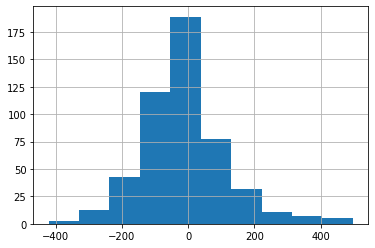

In [47]:
g_p_2006_2016_Nice['TE_voit']=g_p_2006_2016_Nice['voit_2016']-g_p_2006_2016_Nice['voit_2006']
g_p_2006_2016_Nice['TE_voit'].hist()

In [48]:
g_p_2006_2016_Nice['TE_voit'].mean()

-9.843920516115999

In [49]:
g_p_2006_2016_Nice['TE_chom']=g_p_2006_2016_Nice['t_chom_2016']-g_p_2006_2016_Nice['t_chom_2006']

In [50]:
g_p_2006_2016_Nice.shape

(500, 153)

## histogram comparing 2006/2016 for several metrics

In [51]:
'''ax[1].set_title('2016')
ax[1].set_ylabel('Occurences')
ax[1].set_xlabel(draw_feature + ' (Nice)')'''

"ax[1].set_title('2016')\nax[1].set_ylabel('Occurences')\nax[1].set_xlabel(draw_feature + ' (Nice)')"

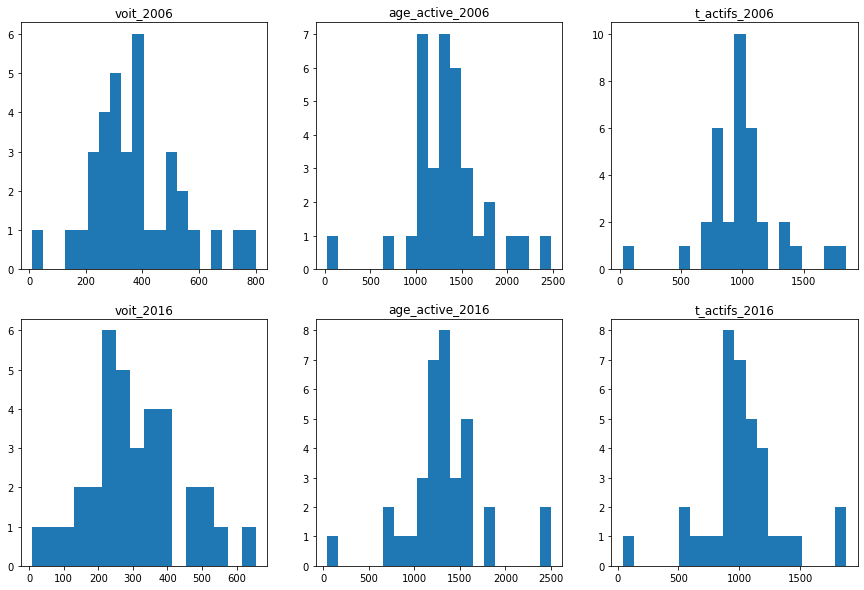

In [52]:
draw_feature1=['voit_2006','age_active_2006','t_actifs_2006','rev_2006','t_chom_2006','tx_empl_prec_2006','T_pop_0_2_2006', 'tx_HH_moins2ans_2006','tx_HLM_2006']
draw_feature2=['voit_2016','age_active_2016','t_actifs_2016','rev_2016','t_chom_2016','tx_empl_prec_2016','T_pop_0_2_2016','tx_HH_moins2ans_2016','tx_HLM_2016']

fig, axs = plt.subplots(2,3, figsize=(15,10), squeeze=True)
#0
max_min_2016=g_p_2016_T1[draw_feature2[0]].max()-g_p_2016_T1[draw_feature2[0]].min()
max_min_2006=g_p_2006_T1[draw_feature1[0]].max()-g_p_2006_T1[draw_feature1[0]].min()
    
axs[0][0].hist(g_p_2006_T1[draw_feature1[0]], bins=20)
axs[1][0].hist(g_p_2016_T1[draw_feature2[0]], bins=int((max_min_2016)*20/(max_min_2006)))
axs[0][0].set_title(f'{draw_feature1[0]}')
axs[1][0].set_title(f'{draw_feature2[0]}')

#1
max_min_2016=g_p_2016_T1[draw_feature2[1]].max()-g_p_2016_T1[draw_feature2[1]].min()
max_min_2006=g_p_2006_T1[draw_feature1[1]].max()-g_p_2006_T1[draw_feature1[1]].min()
    
axs[0][1].hist(g_p_2006_T1[draw_feature1[1]], bins=20)
axs[1][1].hist(g_p_2016_T1[draw_feature2[1]], bins=int((max_min_2016)*20/(max_min_2006)))
axs[0][1].set_title(f'{draw_feature1[1]}')
axs[1][1].set_title(f'{draw_feature2[1]}')

#2
max_min_2016=g_p_2016_T1[draw_feature2[2]].max()-g_p_2016_T1[draw_feature2[2]].min()
max_min_2006=g_p_2006_T1[draw_feature1[2]].max()-g_p_2006_T1[draw_feature1[2]].min()
    
axs[0][2].hist(g_p_2006_T1[draw_feature1[2]], bins=20)
axs[1][2].hist(g_p_2016_T1[draw_feature2[2]], bins=int((max_min_2016)*20/(max_min_2006)))
axs[0][2].set_title(f'{draw_feature1[2]}')
axs[1][2].set_title(f'{draw_feature2[2]}')

plt.show()

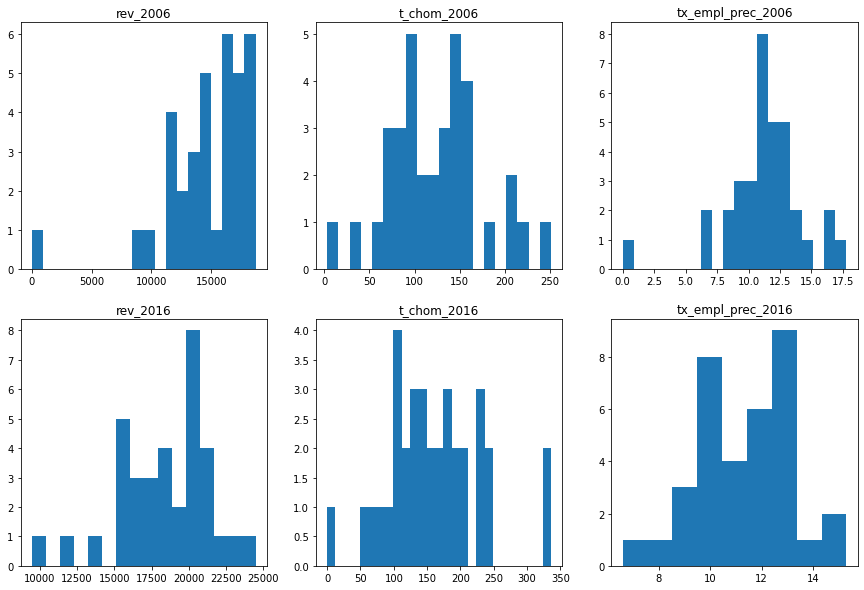

In [53]:
fig, axs = plt.subplots(2,3, figsize=(15,10), squeeze=True)
#3
max_min_2016=g_p_2016_T1[draw_feature2[3]].max()-g_p_2016_T1[draw_feature2[3]].min()
max_min_2006=g_p_2006_T1[draw_feature1[3]].max()-g_p_2006_T1[draw_feature1[3]].min()
    
axs[0][0].hist(g_p_2006_T1[draw_feature1[3]], bins=20)
axs[1][0].hist(g_p_2016_T1[draw_feature2[3]], bins=int((max_min_2016)*20/(max_min_2006)))
axs[0][0].set_title(f'{draw_feature1[3]}')
axs[1][0].set_title(f'{draw_feature2[3]}')

#4
max_min_2016=g_p_2016_T1[draw_feature2[4]].max()-g_p_2016_T1[draw_feature2[4]].min()
max_min_2006=g_p_2006_T1[draw_feature1[4]].max()-g_p_2006_T1[draw_feature1[4]].min()
    
axs[0][1].hist(g_p_2006_T1[draw_feature1[4]], bins=20)
axs[1][1].hist(g_p_2016_T1[draw_feature2[4]], bins=int((max_min_2016)*20/(max_min_2006)))
axs[0][1].set_title(f'{draw_feature1[4]}')
axs[1][1].set_title(f'{draw_feature2[4]}')

#5
max_min_2016=g_p_2016_T1[draw_feature2[5]].max()-g_p_2016_T1[draw_feature2[5]].min()
max_min_2006=g_p_2006_T1[draw_feature1[5]].max()-g_p_2006_T1[draw_feature1[5]].min()
    
axs[0][2].hist(g_p_2006_T1[draw_feature1[5]], bins=20)
axs[1][2].hist(g_p_2016_T1[draw_feature2[5]], bins=int((max_min_2016)*20/(max_min_2006)))
axs[0][2].set_title(f'{draw_feature1[5]}')
axs[1][2].set_title(f'{draw_feature2[5]}')

plt.show()

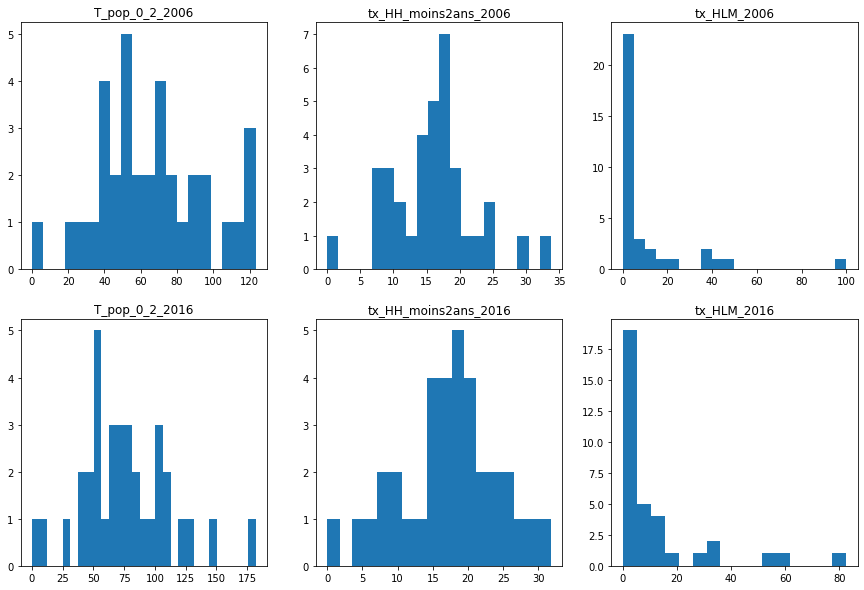

In [54]:
fig, axs = plt.subplots(2,3, figsize=(15,10), squeeze=True)
#6
max_min_2016=g_p_2016_T1[draw_feature2[6]].max()-g_p_2016_T1[draw_feature2[6]].min()
max_min_2006=g_p_2006_T1[draw_feature1[6]].max()-g_p_2006_T1[draw_feature1[6]].min()
    
axs[0][0].hist(g_p_2006_T1[draw_feature1[6]], bins=20)
axs[1][0].hist(g_p_2016_T1[draw_feature2[6]], bins=int((max_min_2016)*20/(max_min_2006)))
axs[0][0].set_title(f'{draw_feature1[6]}')
axs[1][0].set_title(f'{draw_feature2[6]}')

#7
max_min_2016=g_p_2016_T1[draw_feature2[7]].max()-g_p_2016_T1[draw_feature2[7]].min()
max_min_2006=g_p_2006_T1[draw_feature1[7]].max()-g_p_2006_T1[draw_feature1[7]].min()
    
axs[0][1].hist(g_p_2006_T1[draw_feature1[7]], bins=20)
axs[1][1].hist(g_p_2016_T1[draw_feature2[7]], bins=int((max_min_2016)*20/(max_min_2006)))
axs[0][1].set_title(f'{draw_feature1[7]}')
axs[1][1].set_title(f'{draw_feature2[7]}')

#8
max_min_2016=g_p_2016_T1[draw_feature2[8]].max()-g_p_2016_T1[draw_feature2[8]].min()
max_min_2006=g_p_2006_T1[draw_feature1[8]].max()-g_p_2006_T1[draw_feature1[8]].min()
    
axs[0][2].hist(g_p_2006_T1[draw_feature1[8]], bins=20)
axs[1][2].hist(g_p_2016_T1[draw_feature2[8]], bins=int((max_min_2016)*20/(max_min_2006)))
axs[0][2].set_title(f'{draw_feature1[8]}')
axs[1][2].set_title(f'{draw_feature2[8]}')

plt.show()

## unemployment on T1

## merging 2006 and 2016 on T1

In [55]:
g_p_2006_2016_T1 = g_p_2006_T1.merge(g_p_2016_T1, on='iris_id')
g_p_2006_2016_T1.shape

(35, 153)

### voiture descreasing

<AxesSubplot:>

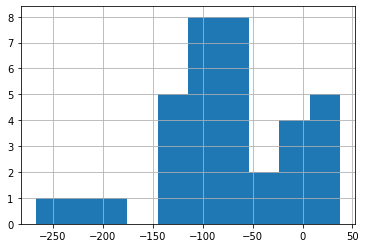

In [56]:
g_p_2006_2016_T1['TE_voit']=g_p_2006_2016_T1['voit_2016']-g_p_2006_2016_T1['voit_2006']
g_p_2006_2016_T1['TE_voit'].hist(bins=10)

In [57]:
g_p_2006_2016_T1['TE_voit'].mean()

-72.85488536379998

### chomage increasing

In [58]:
g_p_2006_2016_T1['TE_chom']=g_p_2006_2016_T1['t_chom_2016']-g_p_2006_2016_T1['t_chom_2006']
g_p_2006_2016_T1['TE_chom'].mean()

37.27064206514285

<AxesSubplot:>

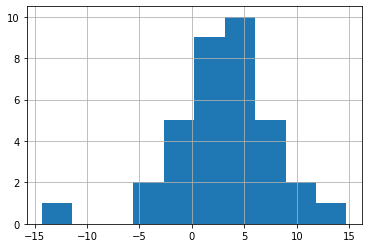

In [59]:
(g_p_2006_2016_T1['tx_chom_2016']-g_p_2006_2016_T1['tx_chom_2006']).hist()

In [60]:
gent_2016_T1.t_chom_2016.sum()


5608.001254280001

In [61]:
g_p_2016_T1.age_active_2016.sum()

46684.10793757

In [62]:
# g_p_2016_T1[['t_chom_2016','NOM_IRIS']].sort_values(by='t_chom_2016',ascending=False).head()

In [63]:
# better use tx_chom because the iris found match low income

In [64]:
g_p_2016_T1[['tx_chom_2016','NOM_IRIS']].sort_values(by='tx_chom_2016',ascending=False).head()

,tx_chom_2016,NOM_IRIS
0,24.122920,Vieux Nice-Sainte Reparate
13,23.587427,Route de Turin
31,22.675020,Garnier-Gare de Provence
10,22.072881,Saint-Charles
29,21.131890,Trachel


# statistic analysis 

## analyse of 35 iris on T1

In [65]:
tx_chom_2006_T1_mean=(g_p_2006_2016_T1['t_chom_2006'].sum())/(g_p_2006_2016_T1['age_active_2006'].sum())
tx_chom_2006_T1_mean

0.09094015004425872

In [66]:
rev_2006_T1_mean=g_p_2006_2016_T1['rev_2006'].mean()
rev_2006_T1_mean

14627.257142857143

In [67]:
iris_moins_fav_2006_T1=g_p_2006_2016_T1[(g_p_2006_2016_T1['tx_chom_2006']>tx_chom_2006_T1_mean) & (g_p_2006_2016_T1['rev_2006']<rev_2006_T1_mean)]
iris_moins_fav_2006_T1

,iris_id,t_actifs_2006,t_chom_2006,empl_2006,ouvrier_2006,TP_2006,Int_2006,app_stage_2006,cdd_2006,rev_2006,...,Tx_pop_11_17_2016,Tx_pop_18_24_2016,Tx_pop_25_39_2016,Tx_pop_40_54_2016,Tx_pop_55_64_2016,Tx_pop_65_79_2016,Tx_pop_80plus_2016,age_active_2016,TE_voit,TE_chom
0,60880102,985.033211,201.969897,321.852605,192.603805,147.774164,20.487421,8.923434,98.095758,11928.0,...,6.275452,15.646078,19.817786,20.692307,13.494897,11.141616,4.867525,894.666437,-97.794903,-49.919408
1,60880103,1049.225880,143.451086,360.323936,160.515274,107.226980,31.471782,31.321245,108.164254,13354.0,...,6.061054,11.864371,18.740407,20.259413,11.311205,14.621529,9.264920,1286.173392,-124.107829,30.927091
3,60880301,973.621019,93.612017,367.409661,203.580451,160.443190,32.494616,23.767294,77.873885,14073.0,...,6.635275,9.815813,18.865837,20.210215,12.688548,13.030376,7.328333,1301.555036,-101.086735,98.735440
4,60880302,807.822425,128.735743,296.742822,207.134932,130.526054,9.590743,24.280006,72.772627,13515.0,...,7.003158,8.047564,20.876423,16.855851,9.250273,13.814843,12.531584,1222.606677,35.627773,43.710629
5,60880501,1847.812216,251.193743,715.040732,454.867038,233.586044,26.148379,44.121354,133.836598,13421.0,...,5.322310,10.454540,20.975490,17.428030,11.797432,17.484023,6.308256,2501.211920,-267.086243,84.635399
11,60880507,1091.311718,148.807950,555.369016,337.290180,189.909447,24.017057,25.719737,65.153400,14269.0,...,7.278957,7.260580,17.231559,19.764028,11.143510,16.403184,6.987060,1581.734534,-25.394320,50.557529
12,60880604,1180.605526,183.821889,489.596439,364.581311,167.172849,47.836396,5.013395,97.382216,12086.0,...,8.615688,8.119909,19.474294,20.254124,8.603511,14.424933,4.730288,1478.251157,-88.134525,-85.682890
13,60880701,777.771249,160.981837,338.764932,268.051348,114.537096,7.510681,8.357786,61.205988,9197.0,...,9.209877,13.425244,19.786587,18.819256,8.983022,8.444451,3.761339,1587.856628,-1.292909,75.209571
16,60881201,1149.537665,127.531921,453.746396,264.730209,156.231308,37.401575,16.963159,68.880947,13051.0,...,7.839012,8.015939,17.252872,15.630082,12.228450,16.742490,8.997805,1449.761920,-190.307132,70.441347
21,60881501,834.868662,78.899722,361.467818,190.896202,138.257540,4.335458,36.899369,80.585236,12077.0,...,7.955338,9.967644,21.499390,18.612511,10.869834,14.144217,6.235539,1170.826926,-106.585214,83.320650


In [68]:
tx_chom_2016_T1_mean=(g_p_2006_2016_T1['t_chom_2016'].sum())/(g_p_2006_2016_T1['age_active_2016'].sum())
tx_chom_2016_T1_mean

0.12012655916611928

In [69]:
rev_2016_T1_mean=g_p_2006_2016_T1['rev_2016'].mean()
rev_2016_T1_mean

18328.371428571427

In [70]:
iris_moins_fav_2016_T1=g_p_2006_2016_T1[(g_p_2006_2016_T1['tx_chom_2016']>tx_chom_2016_T1_mean) & (g_p_2006_2016_T1['rev_2016']<rev_2016_T1_mean)]
iris_moins_fav_2016_T1

,iris_id,t_actifs_2006,t_chom_2006,empl_2006,ouvrier_2006,TP_2006,Int_2006,app_stage_2006,cdd_2006,rev_2006,...,Tx_pop_11_17_2016,Tx_pop_18_24_2016,Tx_pop_25_39_2016,Tx_pop_40_54_2016,Tx_pop_55_64_2016,Tx_pop_65_79_2016,Tx_pop_80plus_2016,age_active_2016,TE_voit,TE_chom
0,60880102,985.033211,201.969897,321.852605,192.603805,147.774164,20.487421,8.923434,98.095758,11928.0,...,6.275452,15.646078,19.817786,20.692307,13.494897,11.141616,4.867525,894.666437,-97.794903,-49.919408
1,60880103,1049.225880,143.451086,360.323936,160.515274,107.226980,31.471782,31.321245,108.164254,13354.0,...,6.061054,11.864371,18.740407,20.259413,11.311205,14.621529,9.264920,1286.173392,-124.107829,30.927091
3,60880301,973.621019,93.612017,367.409661,203.580451,160.443190,32.494616,23.767294,77.873885,14073.0,...,6.635275,9.815813,18.865837,20.210215,12.688548,13.030376,7.328333,1301.555036,-101.086735,98.735440
4,60880302,807.822425,128.735743,296.742822,207.134932,130.526054,9.590743,24.280006,72.772627,13515.0,...,7.003158,8.047564,20.876423,16.855851,9.250273,13.814843,12.531584,1222.606677,35.627773,43.710629
5,60880501,1847.812216,251.193743,715.040732,454.867038,233.586044,26.148379,44.121354,133.836598,13421.0,...,5.322310,10.454540,20.975490,17.428030,11.797432,17.484023,6.308256,2501.211920,-267.086243,84.635399
6,60880502,1457.387831,153.748799,657.815051,330.242906,208.163205,13.678356,21.870353,67.379583,14671.0,...,7.667945,11.717394,23.476112,15.087775,10.080064,12.928481,5.548135,2437.731835,6.590743,175.600736
10,60880506,1064.496958,128.370515,471.382745,196.392952,124.491943,3.669621,19.264046,81.996338,14731.0,...,6.757880,7.865441,12.137804,18.291103,13.527058,16.890741,12.871142,1376.463352,-103.265955,115.626367
11,60880507,1091.311718,148.807950,555.369016,337.290180,189.909447,24.017057,25.719737,65.153400,14269.0,...,7.278957,7.260580,17.231559,19.764028,11.143510,16.403184,6.987060,1581.734534,-25.394320,50.557529
12,60880604,1180.605526,183.821889,489.596439,364.581311,167.172849,47.836396,5.013395,97.382216,12086.0,...,8.615688,8.119909,19.474294,20.254124,8.603511,14.424933,4.730288,1478.251157,-88.134525,-85.682890
13,60880701,777.771249,160.981837,338.764932,268.051348,114.537096,7.510681,8.357786,61.205988,9197.0,...,9.209877,13.425244,19.786587,18.819256,8.983022,8.444451,3.761339,1587.856628,-1.292909,75.209571


## least favorable iris in Nice area

In [71]:
t_chom_2006_Nice_mean=gen_2006_df['t_chom_2006'].mean()
t_chom_2006_Nice_mean

105.01255860599998

In [72]:
rev_2006_Nice_mean=gen_2006_df['rev_2006'].mean()
rev_2006_Nice_mean

17310.4737394958

In [73]:
iris_moins_fav_2006_Nice=gen_2006_df[(gen_2006_df['t_chom_2006']>t_chom_2006_Nice_mean) & (gen_2006_df['rev_2006']<rev_2006_Nice_mean)]
iris_moins_fav_2006_Nice

,iris_id,t_actifs_2006,t_chom_2006,empl_2006,ouvrier_2006,TP_2006,Int_2006,app_stage_2006,cdd_2006,rev_2006,...,tx_TC_2006,tx_HH_moins2ans_2006,tx_HH_2_4ans_2006,tx_HH_5_9ans_2006,tx_HH_plus10ans_2006,tx_HH_with_park_2006,tx_HH_with_voit_2006,tx_HH_1voit_2006,tx_HH_2voit_2006,tx_empl_prec_2006
9,60040107,1357.008560,177.857273,452.490634,291.692338,139.202053,17.460588,27.460044,104.065177,15700.0,...,8.111279,25.334414,29.304848,23.667855,39.831821,78.128590,92.042507,64.826358,27.216149,10.978988
17,60040115,1572.126285,301.835792,473.629952,301.445649,165.517094,34.354535,20.651927,154.771011,13146.0,...,15.145760,28.100968,29.985485,20.899426,45.294149,23.986463,66.211420,58.482469,7.728951,13.343551
25,60040123,1901.570170,307.092000,816.232211,332.107702,251.128935,22.162151,37.929835,170.238938,16480.0,...,6.936318,20.570637,28.927267,33.326721,56.027227,68.763181,94.893055,78.876011,16.017043,12.112670
27,60040125,1703.816138,360.748395,637.672596,349.247215,260.858042,26.049105,32.371162,135.943142,15395.0,...,10.689477,25.802841,35.973368,33.090737,54.213048,69.109262,89.308863,72.002213,17.306649,11.407534
28,60040126,1655.090739,263.576632,618.165964,316.554226,209.626051,45.682602,42.836041,96.346861,15265.0,...,9.771497,19.637102,26.446384,32.813595,50.557033,76.268103,92.032101,78.016494,14.015607,11.169509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,61550105,1517.743947,192.357373,560.126465,430.695603,156.569028,0.000000,31.735601,88.956981,15147.0,...,3.216339,9.478751,21.110557,24.563962,43.895435,73.625236,81.779356,57.223843,24.555512,7.952104
475,61550108,1434.308916,238.403064,517.273584,317.979274,132.853057,26.870647,3.900964,110.795550,16911.0,...,7.248120,18.987699,23.994788,40.125098,52.952180,79.669511,102.346309,85.746327,16.599983,9.870061
476,61550109,1104.434687,174.340594,373.013690,167.913923,126.966188,11.033761,18.286175,62.770356,17219.0,...,7.360418,18.759892,27.432502,25.004752,49.391527,90.516197,98.178783,67.820085,30.358698,8.338229
477,61550110,1410.424238,156.114079,459.612987,326.243851,181.869692,17.859076,3.303346,93.677321,16302.0,...,3.511192,7.082095,22.595980,30.697369,50.145446,92.815459,98.711147,68.298202,30.412945,8.142213


In [74]:
list_Nice_moins_fav_2006=list(iris_moins_fav_2006_Nice['iris_id'])
type(list_Nice_moins_fav_2006)

list

In [75]:
k_2006=[]
for j in range (0, 35):
    if list_T1[j] in list_Nice_moins_fav_2006:
        k_2006.append(list_T1[j])
print(k_2006)

[]


In [76]:
len(k_2006)

0

In [77]:
t_chom_2016_Nice_mean=gen_2016_df['t_chom_2016'].mean()
t_chom_2016_Nice_mean

134.90681203175802

In [78]:
rev_2016_Nice_mean=gen_2016_df['rev_2016'].mean()
rev_2016_Nice_mean

21324.373848523497

In [79]:
iris_moins_fav_2016_Nice=gen_2016_df[(gen_2016_df['t_chom_2016']>t_chom_2016_Nice_mean) & (gen_2016_df['rev_2016']<rev_2016_Nice_mean)]
iris_moins_fav_2016_Nice

,iris_id,t_actifs_2016,t_chom_2016,empl_2016,ouvrier_2016,TP_2016,Int_2016,app_stage_2016,CDD_2016,rev_2016,...,tx_TC_2016,tx_HH_moins2ans_2016,tx_HH_2_4ans_2016,tx_HH_5_9ans_2016,tx_HH_plus10ans_2016,tx_HH_with_park_2016,tx_HH_with_voit_2016,tx_HH_1voit_2016,tx_HH_2voit_2016,tx_empl_prec_2016
9,60040107,1737.658722,220.891327,553.953834,337.135058,220.342279,10.658775,27.460044,99.612259,20884.0,...,8.261967,15.408705,20.071676,15.734282,43.097858,68.318989,80.572802,56.816267,23.756535,7.926244
13,60040111,1177.904572,218.480012,343.738241,211.595052,225.394758,18.834842,8.247147,52.779492,21262.0,...,12.665776,17.729051,23.704093,22.976579,71.422017,91.576559,100.451020,77.125149,23.325870,6.779962
16,60040114,973.521843,174.906685,261.318035,113.164991,67.060941,3.371801,6.374796,71.756038,20816.0,...,21.322696,22.595941,30.248000,29.134402,51.883545,63.618478,77.604379,67.828050,9.776329,8.371937
17,60040115,972.842886,218.601285,263.208999,159.404199,148.053283,13.890382,20.651927,58.172213,17822.0,...,16.528803,30.574662,30.076377,14.571623,49.530877,33.469924,67.127595,59.751149,7.376446,9.530267
25,60040123,1836.208737,300.687624,669.714808,258.766283,268.510289,37.333780,37.929835,127.462493,20177.0,...,14.606492,17.595039,33.372527,24.666073,56.825464,68.240411,82.545074,67.441905,15.103168,11.040472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,61550105,1208.513309,222.301774,457.432631,334.577506,171.104509,17.221172,31.735601,70.133851,18662.0,...,6.586852,13.631324,18.920140,17.910708,66.114523,67.678829,87.545101,59.446277,28.098824,9.854308
475,61550108,1182.254442,185.979444,418.434708,233.849138,173.423369,12.112255,3.900964,106.878431,20894.0,...,8.415656,17.828190,27.962889,25.199770,57.677341,93.801869,101.240075,76.449163,24.790912,10.394687
477,61550110,1325.467932,211.803052,447.686866,273.457196,195.655003,7.366712,3.303346,85.638637,20204.0,...,2.484726,8.869303,20.268871,20.321871,51.184357,84.737250,89.111961,57.051334,32.060627,7.266015
479,61570101,953.317872,145.604856,257.164550,185.931632,147.256184,8.095667,10.626470,62.324281,15714.0,...,6.169376,19.265123,26.951787,20.722772,46.417841,52.957391,81.618096,62.768385,18.849711,8.501510


In [80]:
list_Nice_moins_fav_2016=list(iris_moins_fav_2016_Nice['iris_id'])

In [81]:
k_2016=[]
print(list_T1)
for j in range (0, 35):
    if list_T1[j] in list_Nice_moins_fav_2016:
        k_2016.append(list_T1[j])
        print(list_T1[j])
print(k_2016)

[60881304, 60881503, 60881303, 60881505, 60881302, 60880301, 60881101, 60881804, 60880504, 60880103, 60881506, 60881801, 60881803, 60881504, 60880604, 60882202, 60881201, 60880502, 60880701, 60880505, 60880102, 60880507, 60882201, 60880503, 60880302, 60881805, 60881701, 60880201, 60882203, 60881502, 60880506, 60881501, 60880501, 60881103, 60881202]
[]


In [112]:
len(k_2016)

0

## mobility of population in Nice

array([[<AxesSubplot:title={'center':'tx_HH_moins2ans_2006'}>]],
      dtype=object)

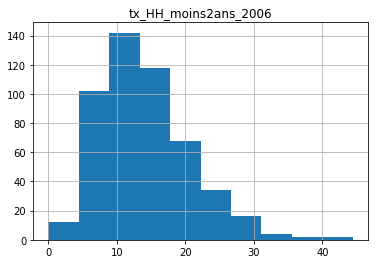

In [83]:
gen_2006_df[['tx_HH_moins2ans_2006']].hist()

array([[<AxesSubplot:title={'center':'tx_HH_moins2ans_2016'}>]],
      dtype=object)

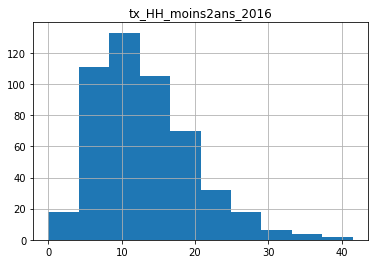

In [84]:
gen_2016_df[['tx_HH_moins2ans_2016']].hist()

# project the T1_iris on a map of Nice

In [85]:
iris_T1_df

,iris_id,NOM_IRIS
0,60881304,Saint-Sylvestre
1,60881503,Jeanne d'Arc-Fuon-Cauda
2,60881303,Gorbella
3,60881505,Michelet
4,60881302,Saint-Barthelemy
5,60880301,Republique
6,60881101,Puget
7,60881804,Clement Roassal
8,60880504,Vauban
9,60880103,Vieux Nice-Visitation


In [86]:
iris_T1_df['lat']=[43.7219521,43.712915,43.7178501,43.7141305,43.7172169,43.7042474,43.7174736,43.7081301,
                   43.7103165,43.6981272,43.7109387,43.704612,43.7061951,43.7109145,43.7216616,43.7032725,
                  43.7309577,43.7094842,43.7203399,43.7125417,43.6971123,43.7239863,43.7007466,43.7149061,
                   43.7070628,43.710044,43.6396803,43.7016171,43.7006416,43.7096915,43.7191111,43.707508,
                   43.7082775,43.7204355,43.7259611]
iris_T1_df['lon']=[7.2409777,7.2549031,7.2482586,7.2498605,7.246386,7.2729379,7.2605525,7.2569876,
                   7.2764779,7.2764457,7.2615526,7.259739,7.2580322,7.2580305,7.27785,7.2635387,
                   7.2524875,7.2881564,7.2853054,7.289532,7.2737684,7.2787611,7.2659075,7.2731025,
                   7.2848124,7.255345,6.9877378,7.2784738,7.2602733,7.2607174,7.2875228,7.2636246,
                  7.2861773,7.2580193,7.2536032]

In [87]:
g_p_2006_2016_T1

,iris_id,t_actifs_2006,t_chom_2006,empl_2006,ouvrier_2006,TP_2006,Int_2006,app_stage_2006,cdd_2006,rev_2006,...,Tx_pop_11_17_2016,Tx_pop_18_24_2016,Tx_pop_25_39_2016,Tx_pop_40_54_2016,Tx_pop_55_64_2016,Tx_pop_65_79_2016,Tx_pop_80plus_2016,age_active_2016,TE_voit,TE_chom
0,60880102,985.033211,201.969897,321.852605,192.603805,147.774164,20.487421,8.923434,98.095758,11928.0,...,6.275452,15.646078,19.817786,20.692307,13.494897,11.141616,4.867525,894.666437,-97.794903,-49.919408
1,60880103,1049.225880,143.451086,360.323936,160.515274,107.226980,31.471782,31.321245,108.164254,13354.0,...,6.061054,11.864371,18.740407,20.259413,11.311205,14.621529,9.264920,1286.173392,-124.107829,30.927091
2,60880201,1106.786320,157.410527,447.078985,166.249397,134.361410,22.450405,24.306656,87.130920,15979.0,...,6.333091,8.393747,21.505460,17.356413,10.431722,16.176988,8.492665,1426.547076,-20.232235,-13.969818
3,60880301,973.621019,93.612017,367.409661,203.580451,160.443190,32.494616,23.767294,77.873885,14073.0,...,6.635275,9.815813,18.865837,20.210215,12.688548,13.030376,7.328333,1301.555036,-101.086735,98.735440
4,60880302,807.822425,128.735743,296.742822,207.134932,130.526054,9.590743,24.280006,72.772627,13515.0,...,7.003158,8.047564,20.876423,16.855851,9.250273,13.814843,12.531584,1222.606677,35.627773,43.710629
5,60880501,1847.812216,251.193743,715.040732,454.867038,233.586044,26.148379,44.121354,133.836598,13421.0,...,5.322310,10.454540,20.975490,17.428030,11.797432,17.484023,6.308256,2501.211920,-267.086243,84.635399
6,60880502,1457.387831,153.748799,657.815051,330.242906,208.163205,13.678356,21.870353,67.379583,14671.0,...,7.667945,11.717394,23.476112,15.087775,10.080064,12.928481,5.548135,2437.731835,6.590743,175.600736
7,60880503,798.857450,67.635012,288.747172,166.156939,81.729849,2.085745,7.108383,63.926269,17105.0,...,4.562919,7.835689,21.976108,14.601591,11.131826,18.218167,9.221081,1270.352034,24.455372,81.110797
8,60880504,1716.373055,159.721609,858.026525,283.298891,214.621860,12.657278,15.430628,171.572123,16291.0,...,8.683442,7.330286,15.421324,21.157814,12.029342,15.492302,5.363953,1802.305644,-206.253363,47.166608
9,60880505,937.088572,87.577162,372.517376,202.365510,103.890591,12.216431,25.156893,28.945402,16452.0,...,4.593164,7.407283,17.962488,15.248158,16.100319,20.603594,9.347022,1191.738584,-116.340718,38.864943


In [164]:
m_voit = folium.Map(location=[43.6969943,7.263675], zoom_start=12.5)
            
for i in range (0,35):
    if g_p_2006_2016_T1['TE_voit'][i]<0:
        color='rouge'
    else:
        color='blue'
    folium.Marker([iris_T1_df.loc[i,'lat'],iris_T1_df.loc[i,'lon']],
                  popup=iris_T1_df['NOM_IRIS'][i],  
              icon=folium.Icon(color=color)).add_to(m_voit)
              
m_voit

<ipython-input-164-160901a91b0e>:10: UserWarning: color argument of Icon should be one of: {'beige', 'lightgray', 'lightgreen', 'black', 'orange', 'cadetblue', 'pink', 'blue', 'red', 'green', 'gray', 'darkgreen', 'white', 'darkpurple', 'lightblue', 'lightred', 'darkred', 'purple', 'darkblue'}.
  icon=folium.Icon(color=color)).add_to(m_voit)


In [102]:
list_iris_decrease_voit=[]
for i in range (0,35):
    if g_p_2006_2016_T1['TE_voit'][i]<0:
        list_iris_decrease_voit.append(g_p_2006_2016_T1['iris_id'][i])
list_iris_decrease_voit

['60880102',
 '60880103',
 '60880201',
 '60880301',
 '60880501',
 '60880504',
 '60880505',
 '60880506',
 '60880507',
 '60880604',
 '60880701',
 '60881101',
 '60881201',
 '60881202',
 '60881302',
 '60881303',
 '60881304',
 '60881501',
 '60881503',
 '60881504',
 '60881505',
 '60881701',
 '60881801',
 '60881803',
 '60881804',
 '60881805',
 '60882201',
 '60882202',
 '60882203']

In [106]:
list_iris_increase_voit=[]
for i in range (0,35):
    if g_p_2006_2016_T1['TE_voit'][i]>0:
        list_iris_increase_voit.append(g_p_2006_2016_T1['iris_id'][i])
list_iris_increase_voit


['60880302', '60880502', '60880503', '60881103', '60881502', '60881506']

In [89]:
m_prio = folium.Map(location=[43.6969943,7.263675], zoom_start=12.5)
            
for i in range (0,35):
    if i in [2,7,8,9,14,15,17,18,19,20,22,23,24,27,31,32,34]:
        color='grey'
    elif i in [0,1,3,4,5,11,12,13,16,21,25,29,30,33]:
        color='red'
    elif i==28:
        color='green'
    elif i in [6,10]:
        color='orange'
    folium.CircleMarker([iris_T1_df.loc[i,'lat'],iris_T1_df.loc[i,'lon']],
                        radius=10,
                        fill=True,
                        opacity=0.2,
                        fill_opacity=0.8,
                  popup=iris_T1_df['NOM_IRIS'][i],  
              color=color).add_to(m_prio)
m_prio

# heatmap

In [90]:
TE_2006_2016_T1=g_p_2006_2016_T1[['TE_voit','TE_chom']]

In [91]:
TE_2006_2016_T1['TE_HLM']=g_p_2006_2016_T1['HLM_2016']-g_p_2006_2016_T1['HLM_2006']

<ipython-input-91-35ebe07ac21c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TE_2006_2016_T1['TE_HLM']=g_p_2006_2016_T1['HLM_2016']-g_p_2006_2016_T1['HLM_2006']


In [92]:
data=g_p_2006_2016_T1[['TE_voit','TE_chom','rev_2006','rev_2016','HLM_2006','HLM_2016','T_pop_0_2_2006','T_pop_0_2_2016']]

In [93]:
# Heatmap
'''plt.figure(figsize=(10,8))
corr = data.corr()
sns.heatmap(corr,
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap= "YlGnBu")'''

'plt.figure(figsize=(10,8))\ncorr = data.corr()\nsns.heatmap(corr,\n        xticklabels=corr.columns,\n        yticklabels=corr.columns,\n        cmap= "YlGnBu")'

In [94]:
't_actifs_2006', 't_chom_2006', 'empl_2006', 'ouvrier_2006',
       'TP_2006', 'Int_2006', 'app_stage_2006', 'cdd_2006', 'rev_2006',
       'HLM_2006', 'no_transp_2006', 'walk_2006', 'moto_2006', 'voit_2006',
       'TC_2006', 'HH_2006', 'HH_moins_2ans_2006', 'HH_2_4ans_2006',
       'HH_5_9ans_2006', 'HH_plus_10ans_2006', 'HH_with_park_2006',
       'HH_with_voit_2006', 'HH_1voit_2006', 'HH_2voit_2006', 'pop_2006',
       'tx_chom_2006', 'tx_empl_2006', 'tx_ouvr_2006', 'tx_TP_2006',
       'tx_HLM_2006', 'tx_no_transp_2006', 'tx_walk_2006', 'tx_moto_2006',
       'tx_voit_2006', 'tx_TC_2006', 'tx_HH_moins2ans_2006',
       'tx_HH_2_4ans_2006', 'tx_HH_5_9ans_2006', 'tx_HH_plus10ans_2006',
       'tx_HH_with_park_2006', 'tx_HH_with_voit_2006', 'tx_HH_1voit_2006',
       'tx_HH_2voit_2006', 'tx_empl_prec_2006'

IndentationError: unexpected indent (<ipython-input-94-ce5c0031da67>, line 2)

In [ ]:
'''scipy.stats.ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate', alternative='two-sided')
Calculate the T-test for the means of two independent samples of scores.

This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances by default.'''

## voit_2006,voit_2016 sur T1 et sur Nice

In [109]:
a_voit_2006_T1=g_p_2006_2016_T1['voit_2006']
b_voit_2016_T1=g_p_2006_2016_T1['voit_2016']

In [113]:
voit_T1_result=stats.ttest_ind(a_voit_2006_T1, b_voit_2016_T1, axis=0, equal_var=True, nan_policy='propagate', alternative='two-sided')
voit_T1_result

Ttest_indResult(statistic=2.013147659328195, pvalue=0.04805997550019761)

In [114]:
a_voit_2006_Nice=g_p_2006_2016_Nice['voit_2006']
b_voit_2016_Nice=g_p_2006_2016_Nice['voit_2016']
voit_Nice_result=stats.ttest_ind(a_voit_2006_Nice, b_voit_2016_Nice, axis=0, equal_var=True, nan_policy='propagate', alternative='two-sided')
voit_Nice_result

Ttest_indResult(statistic=0.38034668095258967, pvalue=0.7037690224267428)

In [143]:
#'tx_HH_1voit_2006'
a_voit1_2006_T1=g_p_2006_2016_T1['tx_HH_1voit_2006']
b_voit1_2016_T1=g_p_2006_2016_T1['tx_HH_1voit_2016']
voit1_T1_result=stats.ttest_ind(a_voit1_2006_T1, b_voit1_2016_T1, axis=0, equal_var=True, nan_policy='propagate', alternative='two-sided')
voit1_T1_result

Ttest_indResult(statistic=0.6868506301757369, pvalue=0.4945126016583049)

In [152]:
imputer = SimpleImputer(strategy='median')
imputer.fit(g_p_2006_2016_Nice[['tx_HH_2voit_2016']]) 
g_p_2006_2016_Nice['tx_HH_2voit_2016']= imputer.transform(g_p_2006_2016_Nice[['tx_HH_2voit_2016']])

In [153]:
g_p_2006_2016_Nice['tx_HH_2voit_2016'].isna().sum()

0

In [144]:
#tx_HH_2voit
a_voit2_2006_T1=g_p_2006_2016_T1['tx_HH_2voit_2006']
b_voit2_2016_T1=g_p_2006_2016_T1['tx_HH_2voit_2016']
voit2_T1_result=stats.ttest_ind(a_voit2_2006_T1, b_voit2_2016_T1, axis=0, equal_var=True, nan_policy='propagate', alternative='two-sided')
voit2_T1_result

Ttest_indResult(statistic=2.4356039704551202, pvalue=0.01749357307322804)

In [154]:
a_voit2_2006_Nice=g_p_2006_2016_Nice['tx_HH_2voit_2006']
b_voit2_2016_Nice=g_p_2006_2016_Nice['tx_HH_2voit_2016']
voit2_Nice_result=stats.ttest_ind(a_voit2_2006_Nice, b_voit2_2016_Nice, axis=0, equal_var=True, nan_policy='propagate', alternative='two-sided')
voit2_Nice_result

Ttest_indResult(statistic=-1.145798652809525, pvalue=0.252153140089498)

In [155]:
#'tx_HH_with_voit_2006'
a_HHvoit_2006_T1=g_p_2006_2016_T1['tx_HH_with_voit_2006']
b_HHvoit_2016_T1=g_p_2006_2016_T1['tx_HH_with_voit_2016']
HHvoit_T1_result=stats.ttest_ind(a_HHvoit_2006_T1, b_HHvoit_2016_T1, axis=0, equal_var=True, nan_policy='propagate', alternative='two-sided')
HHvoit_T1_result

Ttest_indResult(statistic=1.430081853201294, pvalue=0.15727240022517144)

In [171]:
# HH_with_park
a_HH_with_park_2006_T1=g_p_2006_2016_T1['HH_with_park_2006']
b_HH_with_park_2006_T1=g_p_2006_2016_T1['HH_with_park_2016']
HH_with_park_T1_result=stats.ttest_ind(a_HH_with_park_2006_T1, b_HH_with_park_2006_T1, axis=0, equal_var=True, nan_policy='propagate', alternative='two-sided')
HH_with_park_T1_result

Ttest_indResult(statistic=0.10671285417467805, pvalue=0.9153309895585392)

In [156]:
#'tx_walk_2006'
a_walk_2006_T1=g_p_2006_2016_T1['tx_walk_2006']
b_walk_2016_T1=g_p_2006_2016_T1['tx_walk_2016']
walk_T1_result=stats.ttest_ind(a_walk_2006_T1, b_walk_2016_T1, axis=0, equal_var=True, nan_policy='propagate', alternative='two-sided')
walk_T1_result

Ttest_indResult(statistic=2.123013871443956, pvalue=0.03739557016427933)

In [161]:
imputer = SimpleImputer(strategy='median')
imputer.fit(g_p_2006_2016_Nice[['tx_walk_2016']]) 
g_p_2006_2016_Nice['tx_walk_2016']= imputer.transform(g_p_2006_2016_Nice[['tx_walk_2016']])

In [162]:
g_p_2006_2016_Nice['tx_walk_2016'].isna().sum()

0

In [163]:
a_walk_2006_Nice=g_p_2006_2016_Nice['tx_walk_2006']
b_walk_2016_Nice=g_p_2006_2016_Nice['tx_walk_2016']
walk_Nice_result=stats.ttest_ind(a_walk_2006_Nice, b_walk_2016_Nice, axis=0, equal_var=True, nan_policy='propagate', alternative='two-sided')
walk_Nice_result

Ttest_indResult(statistic=2.2498591875400438, pvalue=0.024675096384328847)

In [115]:
# chom
a_chom_2006_T1=g_p_2006_2016_T1['t_chom_2006']
b_chom_2016_T1=g_p_2006_2016_T1['t_chom_2016']
chom_T1_result=stats.ttest_ind(a_chom_2006_T1, b_chom_2016_T1, axis=0, equal_var=True, nan_policy='propagate', alternative='two-sided')
chom_T1_result

Ttest_indResult(statistic=-2.502384120497738, pvalue=0.014745637857276242)

In [117]:
a_chom_2006_Nice=g_p_2006_2016_Nice['t_chom_2006']
b_chom_2016_Nice=g_p_2006_2016_Nice['t_chom_2016']
chom_Nice_result=stats.ttest_ind(a_chom_2006_Nice, b_chom_2016_Nice, axis=0, equal_var=True, nan_policy='propagate', alternative='two-sided')
chom_Nice_result

Ttest_indResult(statistic=-5.803444730708124, pvalue=8.719769431804036e-09)

In [118]:
#TP
a_TP_2006_T1=g_p_2006_2016_T1['TP_2006']
b_TP_2016_T1=g_p_2006_2016_T1['TP_2016']
TP_T1_result=stats.ttest_ind(a_TP_2006_T1, b_TP_2016_T1, axis=0, equal_var=True, nan_policy='propagate', alternative='two-sided')
TP_T1_result

Ttest_indResult(statistic=-0.9808331280771578, pvalue=0.3301518970278845)

In [119]:
#ouvrier
a_ouvrier_2006_T1=g_p_2006_2016_T1['ouvrier_2006']
b_ouvrier_2016_T1=g_p_2006_2016_T1['ouvrier_2016']
ouvrier_T1_result=stats.ttest_ind(a_ouvrier_2006_T1, b_ouvrier_2016_T1, axis=0, equal_var=True, nan_policy='propagate', alternative='two-sided')
ouvrier_T1_result

Ttest_indResult(statistic=1.004430516622581, pvalue=0.31873206014409694)

In [170]:
#tx_empl_prec
a_empl_prec_2006_T1=g_p_2006_2016_T1['tx_empl_prec_2006']
b_empl_prec_2016_T1=g_p_2006_2016_T1['tx_empl_prec_2016']
prec_T1_result=stats.ttest_ind(a_empl_prec_2006_T1, b_empl_prec_2016_T1, axis=0, equal_var=True, nan_policy='propagate', alternative='two-sided')
prec_T1_result

Ttest_indResult(statistic=-0.07859632665884865, pvalue=0.937584537979079)

In [121]:
# empl
a_empl_2006_T1=g_p_2006_2016_T1['empl_2006']
b_empl_2016_T1=g_p_2006_2016_T1['empl_2016']
empl_T1_result=stats.ttest_ind(a_empl_2006_T1, b_empl_2016_T1, axis=0, equal_var=True, nan_policy='propagate', alternative='two-sided')
empl_T1_result

Ttest_indResult(statistic=0.537137729155851, pvalue=0.5929257989627509)

In [122]:
#Int
a_int_2006_T1=g_p_2006_2016_T1['Int_2006']
b_int_2016_T1=g_p_2006_2016_T1['Int_2016']
int_T1_result=stats.ttest_ind(a_int_2006_T1, b_int_2016_T1, axis=0, equal_var=True, nan_policy='propagate', alternative='two-sided')
int_T1_result

Ttest_indResult(statistic=0.7754367297576591, pvalue=0.440770072771858)

In [133]:
imputer = SimpleImputer(strategy='median')
imputer.fit(g_p_2006_2016_Nice[['rev_2006']]) 
g_p_2006_2016_Nice['rev_2006']= imputer.transform(g_p_2006_2016_Nice[['rev_2006']])
imputer = SimpleImputer(strategy='median')
imputer.fit(g_p_2006_2016_Nice[['rev_2016']]) 
g_p_2006_2016_Nice['rev_2016']= imputer.transform(g_p_2006_2016_Nice[['rev_2016']])

In [138]:
#rev
a_rev_2006_T1=g_p_2006_2016_T1['rev_2006']
b_rev_2016_T1=g_p_2006_2016_T1['rev_2016']
rev_T1_result=stats.ttest_ind(a_rev_2006_T1, b_rev_2016_T1, axis=0, equal_var=True, nan_policy='propagate', alternative='two-sided')
#rev_T1_result
a_rev_2006_Nice=g_p_2006_2016_Nice['rev_2006']
b_rev_2016_Nice=g_p_2006_2016_Nice['rev_2016']
rev_Nice_result=stats.ttest_ind(a_rev_2006_Nice, b_rev_2016_Nice, axis=0, equal_var=True, nan_policy='propagate', alternative='two-sided')
#rev_Nice_result

In [140]:
'HLM_2006'
a_HLM_2006_T1=g_p_2006_2016_T1['HLM_2006']
b_HLM_2016_T1=g_p_2006_2016_T1['HLM_2016']
HLM_T1_result=stats.ttest_ind(a_int_2006_T1, b_int_2016_T1, axis=0, equal_var=True, nan_policy='propagate', alternative='two-sided')
HLM_T1_result

Ttest_indResult(statistic=0.7754367297576591, pvalue=0.440770072771858)

In [141]:
#HH_moins_2ans
a_HH0_2_2006_T1=g_p_2006_2016_T1['HH_moins_2ans_2006']
b_HH0_2_2016_T1=g_p_2006_2016_T1['HH_moins_2ans_2016']
HH0_2_T1_result=stats.ttest_ind(a_HH0_2_2006_T1, b_HH0_2_2016_T1, axis=0, equal_var=True, nan_policy='propagate', alternative='two-sided')
HH0_2_T1_result

Ttest_indResult(statistic=-0.654006920116557, pvalue=0.5153130888823914)

In [142]:
#HH_plus_10ans
a_HH_10_2006_T1=g_p_2006_2016_T1['HH_plus_10ans_2006']
b_HH_10_2016_T1=g_p_2006_2016_T1['HH_plus_10ans_2016']
HH_10_T1_result=stats.ttest_ind(a_HH_10_2006_T1, b_HH_10_2016_T1, axis=0, equal_var=True, nan_policy='propagate', alternative='two-sided')
HH_10_T1_result

Ttest_indResult(statistic=-1.2437672312297807, pvalue=0.21785592067022908)

In [ ]:
'''
'iris_id', 'T_pop_0_2_2006', 'T_pop_3_5_2006', 'T_pop_6_10_2006',
       'T_pop_11_17_2006', 'T_pop_18_24_2006', 'T_pop_25_39_2006',
       'T_pop_40_54_2006', 'T_pop_55_64_2006', 'T_pop_65_79_2006',
       'T_pop_80plus_2006', 'T_pop_0_2_2016', 'T_pop_3_5_2016',
       'T_pop_6_10_2016', 'T_pop_11_17_2016', 'T_pop_18_24_2016',
       'T_pop_25_39_2016', 'T_pop_40_54_2016', 'T_pop_55_64_2016',
       'T_pop_65_79_2016', 'T_pop_80plus_2016', 'TE_pop_0_2', 'TE_pop_3_5',
       'TE_pop_6_10', 'TE_pop_11_17', 'TE_pop_18_24', 'TE_pop_25_39',
       'TE_pop_40_54', 'TE_pop_55_64', 'TE_pop_65_79', 'TE_pop_80plus',
       'Tx_pop_0_2_2006', 'Tx_pop_3_5_2006', 'Tx_pop_6_10_2006',
       'Tx_pop_11_17_2006', 'Tx_pop_18_24_2006', 'Tx_pop_25_39_2006',
       'Tx_pop_40_54_2006', 'Tx_pop_55_64_2006', 'Tx_pop_65_79_2006',
       'Tx_pop_80plus_2006', 'Tx_pop_0_2_2016', 'Tx_pop_3_5_2016',
       'Tx_pop_6_10_2016', 'Tx_pop_11_17_2016', 'Tx_pop_18_24_2016',
       'Tx_pop_25_39_2016', 'Tx_pop_40_54_2016', 'Tx_pop_55_64_2016',
       'Tx_pop_65_79_2016', 'Tx_pop_80plus_2016'
'''

In [165]:
#T_pop_0_2
a_pop_02_2006_T1=g_p_2006_2016_T1['T_pop_0_2_2006']
b_pop_02_2016_T1=g_p_2006_2016_T1['T_pop_0_2_2016']
pop_02_T1_result=stats.ttest_ind(a_pop_02_2006_T1, b_pop_02_2016_T1, axis=0, equal_var=True, nan_policy='propagate', alternative='two-sided')
pop_02_T1_result

Ttest_indResult(statistic=-1.1576038088490301, pvalue=0.2510757146563985)

In [166]:
#Tx_pop_80plus
a_pop_80_2006_T1=g_p_2006_2016_T1['Tx_pop_80plus_2006']
b_pop_80_2016_T1=g_p_2006_2016_T1['Tx_pop_80plus_2016']
pop_80_T1_result=stats.ttest_ind(a_pop_80_2006_T1, b_pop_80_2016_T1, axis=0, equal_var=True, nan_policy='propagate', alternative='two-sided')
pop_80_T1_result

Ttest_indResult(statistic=-1.317931737291909, pvalue=0.19194921220000474)

In [167]:
#age_active
a_age_active_2006_T1=g_p_2006_2016_T1['age_active_2006']
b_age_active_2016_T1=g_p_2006_2016_T1['age_active_2016']
age_active_T1_result=stats.ttest_ind(a_age_active_2006_T1, b_age_active_2016_T1, axis=0, equal_var=True, nan_policy='propagate', alternative='two-sided')
age_active_T1_result

Ttest_indResult(statistic=0.17782796303727105, pvalue=0.8593867672089897)

In [172]:
#Tx_pop_18_24
a_pop_18_24_2006_T1=g_p_2006_2016_T1['Tx_pop_18_24_2006']
b_pop_18_24_2016_T1=g_p_2006_2016_T1['Tx_pop_18_24_2016']
pop_18_24_T1_result=stats.ttest_ind(a_pop_18_24_2006_T1, b_pop_18_24_2016_T1, axis=0, equal_var=True, nan_policy='propagate', alternative='two-sided')
pop_18_24_T1_result

Ttest_indResult(statistic=0.2580460776656282, pvalue=0.7971507309702522)

In [173]:
# Tx_pop_25_39_2006
a_pop_25_39_2006_T1=g_p_2006_2016_T1['Tx_pop_25_39_2006']
b_pop_25_39_2016_T1=g_p_2006_2016_T1['Tx_pop_25_39_2016']
pop_25_39_T1_result=stats.ttest_ind(a_pop_25_39_2006_T1, b_pop_25_39_2016_T1, axis=0, equal_var=True, nan_policy='propagate', alternative='two-sided')
pop_25_39_T1_result

Ttest_indResult(statistic=-0.10719457173823145, pvalue=0.9149502608376485)

In [175]:
# Tx_pop_40_54_2006
a_pop_40_54_2006_T1=g_p_2006_2016_T1['Tx_pop_40_54_2006']
b_pop_40_54_2016_T1=g_p_2006_2016_T1['Tx_pop_40_54_2016']
pop_40_54_T1_result=stats.ttest_ind(a_pop_40_54_2006_T1, b_pop_40_54_2016_T1, axis=0, equal_var=True, nan_policy='propagate', alternative='two-sided')
pop_40_54_T1_result

Ttest_indResult(statistic=-0.7482765282152607, pvalue=0.45687365558778104)

In [176]:
# Tx_pop_55_64_2006
a_pop_55_64_2006_T1=g_p_2006_2016_T1['Tx_pop_55_64_2006']
b_pop_55_64_2016_T1=g_p_2006_2016_T1['Tx_pop_55_64_2016']
pop_55_64_T1_result=stats.ttest_ind(a_pop_55_64_2006_T1, b_pop_55_64_2016_T1, axis=0, equal_var=True, nan_policy='propagate', alternative='two-sided')
pop_55_64_T1_result

Ttest_indResult(statistic=1.1131182353367022, pvalue=0.2695770804093276)

In [177]:
# Tx_pop_65_79_2006
a_pop_65_79_2006_T1=g_p_2006_2016_T1['Tx_pop_65_79_2006']
b_pop_65_79_2016_T1=g_p_2006_2016_T1['Tx_pop_65_79_2016']
pop_65_79_T1_result=stats.ttest_ind(a_pop_65_79_2006_T1, b_pop_65_79_2016_T1, axis=0, equal_var=True, nan_policy='propagate', alternative='two-sided')
pop_65_79_T1_result

Ttest_indResult(statistic=0.43168419434534966, pvalue=0.6673366060444792)

# saving the DataFrame as a CSV file

In [ ]:
gfg_csv_data = df.to_csv('GfG.csv', index = True)